In [1]:
#csvファイルを読み込む
import pandas as pd

# ファイルパス（適宜変更してください）
file_path = "America_historical_energy_use.csv"

# 読み込み
df = pd.read_csv(file_path)

# 先頭5行を確認
print(df.head())

# データの概要
print(df.info())



   Year  Coal  Natural Gas  Petroleum  Nuclear Electric Power  \
0  1635   NaN          NaN        NaN                     NaN   
1  1645   NaN          NaN        NaN                     NaN   
2  1655   NaN          NaN        NaN                     NaN   
3  1665   NaN          NaN        NaN                     NaN   
4  1675   NaN          NaN        NaN                     NaN   

   Hydroelectric Power   Wood  
0                  NaN    NaN  
1                  NaN  0.001  
2                  NaN  0.002  
3                  NaN  0.005  
4                  NaN  0.007  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Year                    94 non-null     int64  
 1   Coal                    72 non-null     float64
 2   Natural Gas             65 non-null     float64
 3   Petroleum               70 non-null     float

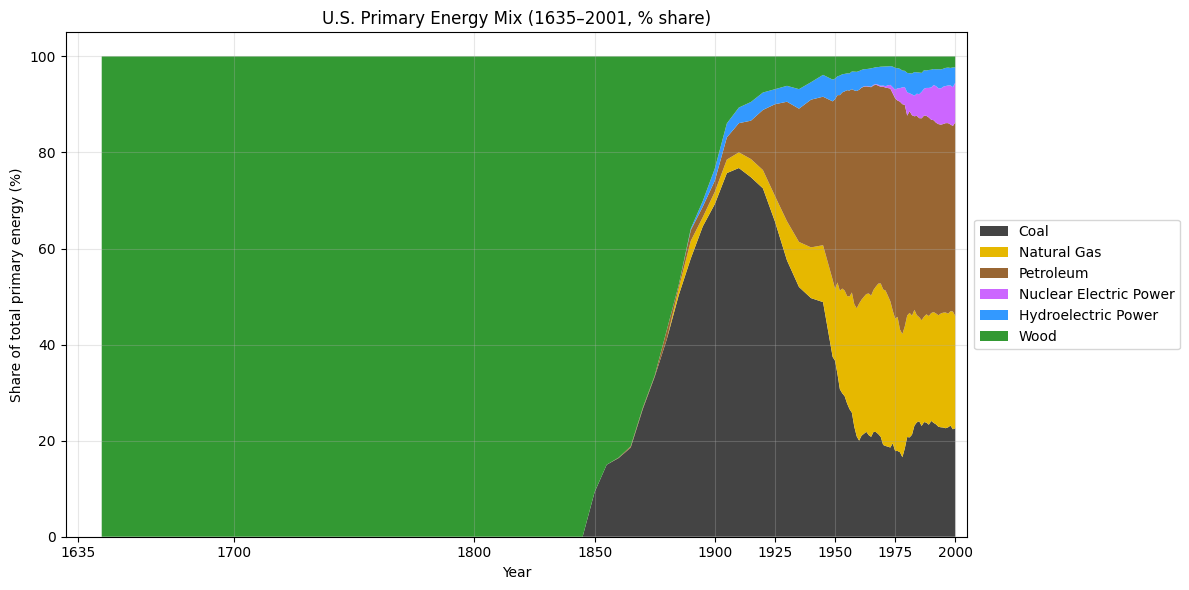

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# === CSVの読み込み ===
file_path = "America_historical_energy_use.csv"
df = pd.read_csv(file_path)

# === データ前処理 ===
# 数値列だけを抽出
energy_cols = ['Coal', 'Natural Gas', 'Petroleum', 'Nuclear Electric Power', 'Hydroelectric Power', 'Wood']
df = df[['Year'] + energy_cols]

# 年が昇順に並んでいなければ並べ替え
df = df.sort_values('Year')

# NaNを0に置き換え（存在しないエネルギー源は0）
df[energy_cols] = df[energy_cols].fillna(0)

# === 割合（%）に変換 ===
df_sum = df[energy_cols].sum(axis=1)
share = df[energy_cols].div(df_sum, axis=0) * 100

# === カラーパレット設定（2枚目の例に近い雰囲気） ===
colors = {
    'Coal': '#444444',              # ダークグレー（石炭）
    'Petroleum': '#996633',         # 茶色（石油）
    'Natural Gas': '#e6b800',       # 黄色（天然ガス）
    'Hydroelectric Power': '#3399ff', # 水色（水力）
    'Nuclear Electric Power': '#cc66ff', # 紫（原子力）
    'Wood': '#339933'               # 緑（バイオマス）
}

# === プロット ===
plt.figure(figsize=(12,6))

plt.stackplot(df['Year'],
              *[share[c] for c in energy_cols],
              labels=energy_cols,
              colors=[colors[c] for c in energy_cols])

plt.xlabel('Year')
plt.ylabel('Share of total primary energy (%)')
plt.title('U.S. Primary Energy Mix (1635–2001, % share)')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.grid(alpha=0.3)

# === 年代軸のスケールを調整 ===
# 初期（1600–1850）は間隔が疎、近代（1900以降）は密
major_ticks = [1635, 1700, 1800, 1850, 1900, 1925, 1950, 1975, 2000]
plt.xticks(major_ticks)
plt.xlim(1630, 2005)

plt.tight_layout()
plt.show()
